# Jonathan Halverson
# Saturday, March 18, 2017
# NLP of a television treatment

Here we analyze an outline of a television series. We are most interested in describing the frequency and placement of the main characters as well as their relationships.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('halverson')
%matplotlib inline

In [2]:
from unidecode import unidecode
from nltk.corpus import stopwords

In [3]:
import nltk

In [4]:
# file is UTF-8 encoding
with open('wife.txt') as f:
     line = f.read()

In [5]:
line

' TOM CARROZZA\n329 W. 21st St., #1F, NYC (917) 553-0509 Zestytomato@aol.com\nTREATMENT:\n1-hour series. Comedy / Thriller\n\xe2\x80\x9cI SMELL A WIFE\xe2\x80\x9d\nby Tom Carrozza \xc2\xa9 2017\nDirected by Jonathan Halverson\nQuick Synopsis:\nDoggy (Douglas) Pendergast snapped and killed his wife Peterine, but he has a bad shoulder and cannot dispose of the body. At a bar he finds a troubled loner named Puck Nubly, and brings him home to help him finish the job. Puck misreads the situation entirely and thinks this is love. Puck is ready to nest, and he moves in and does so - much to the added shock of Doggy\xe2\x80\x99s grown children Agatha and Vito. As suspicions fire up, Doggy decides to go Puck\xe2\x80\x99s way - they are in love - because it is the perfect cover, and it is better to be gay\n1\n      \n than a murderer. Things unravel quickly and the story ripples through their little town, Random Ash Falls, which frames an every widening circle of Striking Characters. This death 

In [6]:
type(line)

str

First, let's decode the text:

In [7]:
line = line.decode('utf-8')

In [8]:
type(line)

unicode

In [9]:
line

u' TOM CARROZZA\n329 W. 21st St., #1F, NYC (917) 553-0509 Zestytomato@aol.com\nTREATMENT:\n1-hour series. Comedy / Thriller\n\u201cI SMELL A WIFE\u201d\nby Tom Carrozza \xa9 2017\nDirected by Jonathan Halverson\nQuick Synopsis:\nDoggy (Douglas) Pendergast snapped and killed his wife Peterine, but he has a bad shoulder and cannot dispose of the body. At a bar he finds a troubled loner named Puck Nubly, and brings him home to help him finish the job. Puck misreads the situation entirely and thinks this is love. Puck is ready to nest, and he moves in and does so - much to the added shock of Doggy\u2019s grown children Agatha and Vito. As suspicions fire up, Doggy decides to go Puck\u2019s way - they are in love - because it is the perfect cover, and it is better to be gay\n1\n      \n than a murderer. Things unravel quickly and the story ripples through their little town, Random Ash Falls, which frames an every widening circle of Striking Characters. This death effects everyone. A suicide

When the line string is printed the newline characters are correctly interpreted.

In [10]:
line = line.encode("ascii", "ignore").replace('\n', ' ')
line

' TOM CARROZZA 329 W. 21st St., #1F, NYC (917) 553-0509 Zestytomato@aol.com TREATMENT: 1-hour series. Comedy / Thriller I SMELL A WIFE by Tom Carrozza  2017 Directed by Jonathan Halverson Quick Synopsis: Doggy (Douglas) Pendergast snapped and killed his wife Peterine, but he has a bad shoulder and cannot dispose of the body. At a bar he finds a troubled loner named Puck Nubly, and brings him home to help him finish the job. Puck misreads the situation entirely and thinks this is love. Puck is ready to nest, and he moves in and does so - much to the added shock of Doggys grown children Agatha and Vito. As suspicions fire up, Doggy decides to go Pucks way - they are in love - because it is the perfect cover, and it is better to be gay 1         than a murderer. Things unravel quickly and the story ripples through their little town, Random Ash Falls, which frames an every widening circle of Striking Characters. This death effects everyone. A suicide note in Peterines handwriting emerges, 

### Let's get all the words in capital letters:

In [11]:
s = ''
for c in line:
     s += c if c.isupper() else ' '
s

' TOM CARROZZA     W       S      F  NYC                Z                   TREATMENT                 C        T        I SMELL A WIFE    T   C              D           J        H         Q     S         D      D        P                                      P                                                                   A                                        P    N                                                      P                                                             P                                                                               D                     A          V     A                      D                   P                                                                                                                     T                                                                       R      A   F                                               S        C           T                            A                 P                              

In [12]:
import re
s = re.sub("[^A-Z]", " ", line)
s

' TOM CARROZZA     W       S      F  NYC                Z                   TREATMENT                 C        T        I SMELL A WIFE    T   C              D           J        H         Q     S         D      D        P                                      P                                                                   A                                        P    N                                                      P                                                             P                                                                               D                     A          V     A                      D                   P                                                                                                                     T                                                                       R      A   F                                               S        C           T                            A                 P                              

In [13]:
from collections import Counter
c = Counter(s.split())
c.most_common()

[('DOGGY', 195),
 ('PUCK', 155),
 ('HE', 114),
 ('T', 96),
 ('I', 95),
 ('SHE', 65),
 ('PETERINE', 65),
 ('A', 56),
 ('VITO', 55),
 ('THEY', 54),
 ('P', 46),
 ('THORGOLF', 40),
 ('W', 39),
 ('PAMELA', 37),
 ('S', 36),
 ('AGATHA', 34),
 ('YUN', 33),
 ('OFFICER', 32),
 ('H', 27),
 ('N', 25),
 ('CLYDE', 23),
 ('ELEANOR', 23),
 ('Y', 23),
 ('D', 22),
 ('DR', 21),
 ('THE', 20),
 ('EPISODE', 20),
 ('MISS', 19),
 ('TRAUT', 19),
 ('TIPTANNER', 18),
 ('B', 18),
 ('M', 18),
 ('SMACKERS', 17),
 ('O', 17),
 ('REVEREND', 16),
 ('C', 16),
 ('STOVE', 16),
 ('E', 14),
 ('DOVEDEAD', 14),
 ('RODNEY', 13),
 ('R', 13),
 ('ROSEMARY', 13),
 ('HIM', 13),
 ('STARLIGHT', 12),
 ('HER', 12),
 ('F', 12),
 ('IRVING', 12),
 ('SIMONE', 11),
 ('DOGGYS', 10),
 ('G', 9),
 ('IVY', 9),
 ('L', 8),
 ('OF', 8),
 ('V', 8),
 ('HIS', 8),
 ('REACTION', 7),
 ('J', 7),
 ('OTHERS', 6),
 ('HEAD', 6),
 ('PINEAPPLE', 6),
 ('PETERINES', 5),
 ('CAMERA', 5),
 ('WILLARD', 5),
 ('TO', 5),
 ('BOTH', 5),
 ('SEASON', 5),
 ('U', 5),
 ('CHANTI

In [14]:
main_chars = ["DOGGY", "PETERINE", "PUCK", "THORGOLF", "STARLIGHT", "AGATHA", "ALLONDRA",
              "VITO", "PAMELA", "YUN", "ELEANOR", "CLYDE", "TRAUT", "SMACKERS", "TIPTANNER",
              "IVY", "IRVING", "RODNEY", "ROSEMARY", "SIMONE", "WILLARD", "CHANTILLY",
              "PINEAPPLE", "STOVE", "REVEREND"]

In [15]:
wife_corpus = nltk.Text(line.split())

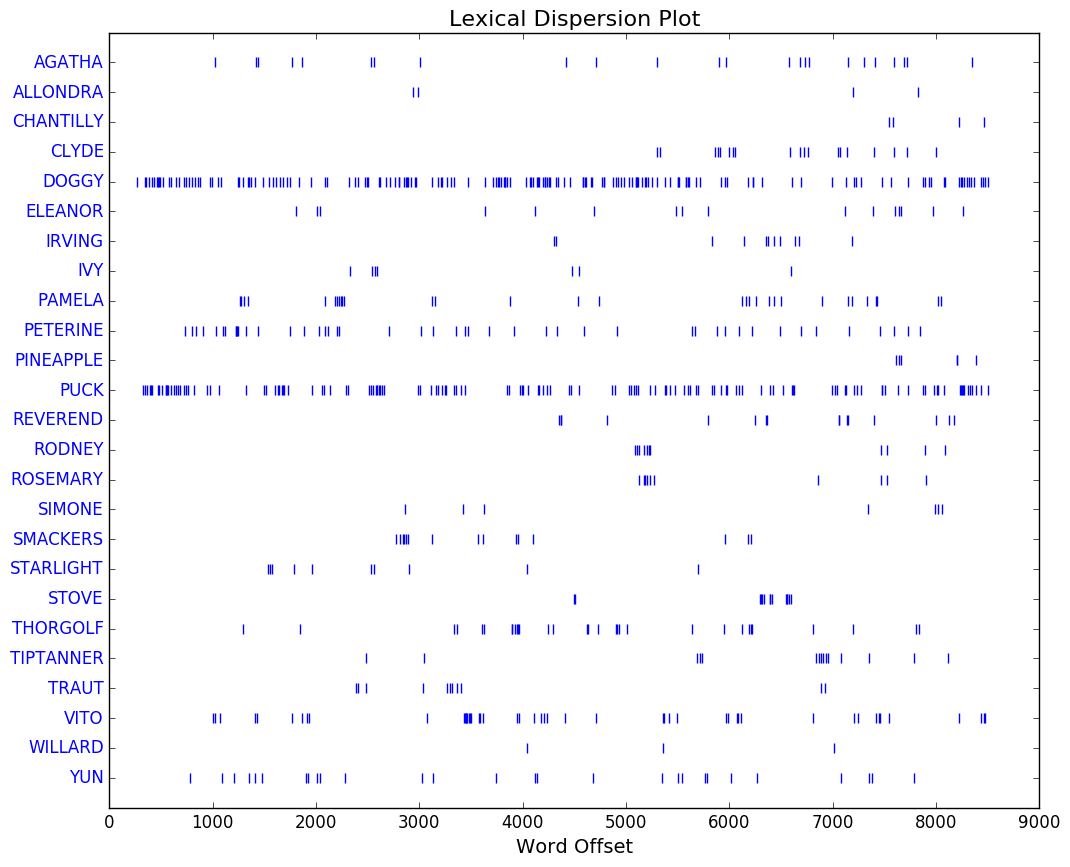

In [16]:
fig, ax = plt.subplots(figsize=(12, 10))
wife_corpus.dispersion_plot(sorted(main_chars))
fig.savefig('dispersion_plot_wife.jpg')

### Let's make a frequency plot

In [18]:
main_chars_lower = set(item.lower() for item in main_chars)
stops = stopwords.words("english")
letters_only = re.sub("[^a-zA-Z]", " ", line)
words = letters_only.lower().split()
h = [word for word in words if all([word not in stops, word not in main_chars_lower])]

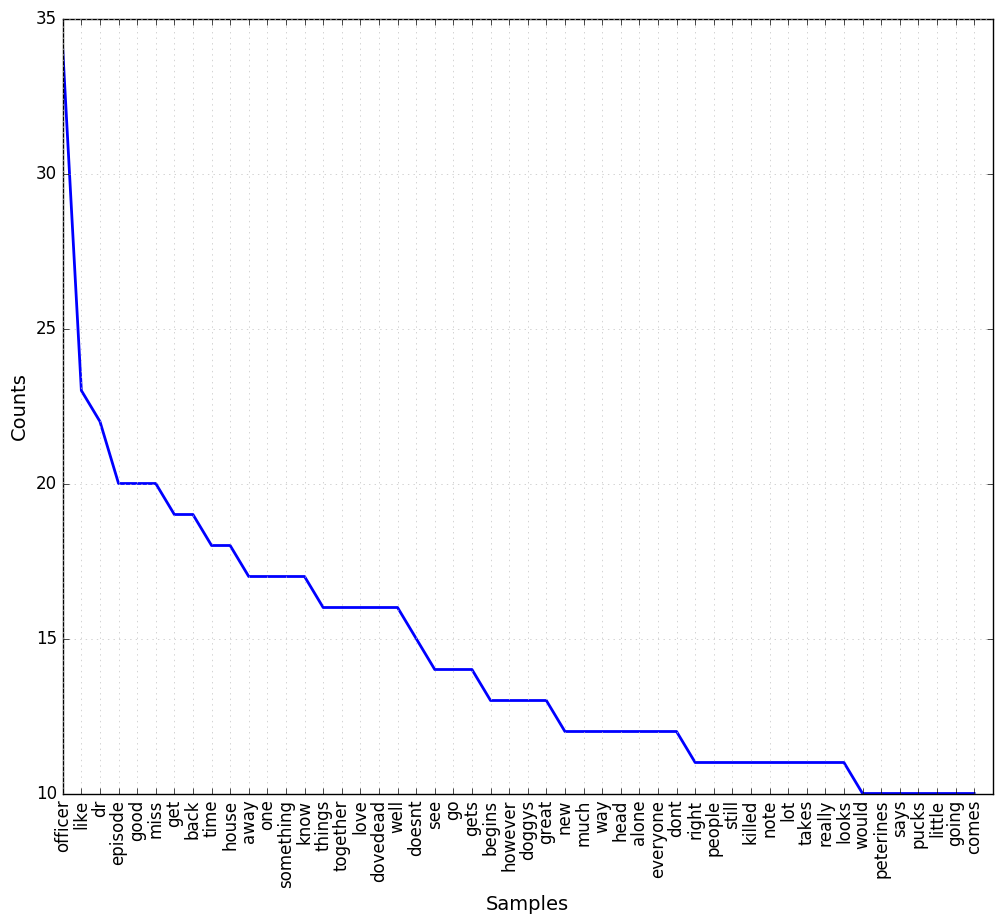

In [19]:
fig, ax = plt.subplots(figsize=(12, 10))
fdist = nltk.FreqDist(h)
fdist.plot(50, cumulative=False)